<a href="https://colab.research.google.com/github/hussain0048/Water-borne-diseases/blob/main/Watern_Brone_Disease_9_21_2021(Malaria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Content**

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://co">Introduction</a></li>
        <li><a href="#downloading_data">Importing libraries</a></li>
        <li><a href="#Processing">Processing</a></li>
        <li><a href="#setting_up_tree">Splitting Training and Test Set</a></li>
        <li><a href="#modeling">Modle Training</a></li>
        <li><a href="#prediction">Saving model to disk</a></li>
        <li><a href="#evaluation">References</a></li>
    </ol>
</div>
<br>
<hr>

# **1- Introduction**
 the water-borne diseases are the most common which transmitted in contaminated fresh water, whether in bathing, washing, drinking, or in the preparation of food.. More than one-third of Earth&#39;s accessible renewable freshwater is consumptively used for agricultural, industrial, and
domestic purposes. Water-borne diseases are commonly found throughout the world but the
condition is more aggravated in developing countries including Pakistan. 

#**2-Importing libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 


#**3-Processing**


## **3.1 Data Reading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [5]:
df.head()

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310163e+12,NaN,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220136e+12,NaN,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310109e+12,NaN,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,Negative


## 3.2- **Drop Columns**

In [6]:
df.drop(labels=['Unnamed: 0', 'SECTION_NO', 'MRNO', 'PATIENT_NAME', 'FATHER_NAME',
       'HUSBAND_NAME', 'NIC_NEW', 'REFERRED_FROM', 'NO_OF_ADMISSION', 'TEHSIL', 'REPORT_VERIFIED', 'CPT_ID',
       'RESULT_VALUE', 'CPT_ID.1', 'SECTION_NO.1'],axis=1,inplace=True)

In [7]:
df

,AGE,GENDER,DISTRICT,RESULT_TEXT
0,34 Year(s),Male,Abbottabad,Negative
1,43 Year(s),Male,Abbottabad,Negative
2,43 Year(s),Male,Abbottabad,Negative
3,28 Year(s),Male,Abbottabad,Negative
4,42 Year(s),Male,Abbottabad,Negative
...,...,...,...,...
22911,13 Year(s),Male,Haripur,Negative
22912,20 Year(s),Male,Abbottabad,Negative
22913,21 Year(s),Male,Abbottabad,Negative
22914,45 Year(s),Female,Abbottabad,Negative


In [8]:
df.head()

,AGE,GENDER,DISTRICT,RESULT_TEXT
0,34 Year(s),Male,Abbottabad,Negative
1,43 Year(s),Male,Abbottabad,Negative
2,43 Year(s),Male,Abbottabad,Negative
3,28 Year(s),Male,Abbottabad,Negative
4,42 Year(s),Male,Abbottabad,Negative


## **3.3 Remove string from Age**

In [9]:
df['Age'] = df['AGE'].str.split().str[0]

In [10]:
df.head()

,AGE,GENDER,DISTRICT,RESULT_TEXT,Age
0,34 Year(s),Male,Abbottabad,Negative,34
1,43 Year(s),Male,Abbottabad,Negative,43
2,43 Year(s),Male,Abbottabad,Negative,43
3,28 Year(s),Male,Abbottabad,Negative,28
4,42 Year(s),Male,Abbottabad,Negative,42


In [11]:
df.drop(['AGE'],axis=1,inplace=True)


In [12]:
df

,GENDER,DISTRICT,RESULT_TEXT,Age
0,Male,Abbottabad,Negative,34
1,Male,Abbottabad,Negative,43
2,Male,Abbottabad,Negative,43
3,Male,Abbottabad,Negative,28
4,Male,Abbottabad,Negative,42
...,...,...,...,...
22911,Male,Haripur,Negative,13
22912,Male,Abbottabad,Negative,20
22913,Male,Abbottabad,Negative,21
22914,Female,Abbottabad,Negative,45


##**3.4 Convert target variable into binary Form**

In [13]:
df['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)


In [ ]:
df

## **3.7- Check unique value** 

In [ ]:
print(df['DISTRICT'].unique())


['Abbottabad' 'Mansehra' 'Haripur' 'Kohistan' 'Peshawar' 'Batgram' 'Bolan'
 'Shangla' 'RahimYar Khan' 'Mardan' 'MUZAFFARABAD' 'Lower Dir' 'DIAMIR'
 'ISLAMABAD' 'Lasbela' 'GILGIT' 'Vehari' 'Swat' 'Swabi' 'Tharparkar'
 'BAGH' 'UNKNOWN F.A.T.A' 'Mianwali' 'Attock' 'Dadu' 'Charsadda' 'ORAKZAI'
 'MIRPUR' 'Lahore' 'KHYBER' 'Upper Dir' 'Hangu' 'KURRAM' 'Zhob' 'POONCH'
 'Nowshera' 'Rawalpindi' 'MOHMAND']


In [ ]:
print(df['GENDER'].unique())

['Male' 'Female' 'Neuter']


##**3.7 Hot Encoding**

In [15]:
#Label encoding executed manually
DISTRICT_dict = { 'Abbottabad':0, 'Mansehra':1, 'Haripur':2, 'Kohistan':3, 'Peshawar':4, 'Batgram':5, 'Bolan':6, 'Shangla':7, 'RahimYar Khan':8, 'Mardan':9, 'MUZAFFARABAD':10, 'Lower Dir':11, 'DIAMIR':12, 'ISLAMABAD':13, 'Lasbela':14, 'GILGIT':15, 'Vehari':16, 'Swat':17, 'Swabi':18, 'Tharparkar':19,'BAGH':20, 'UNKNOWN F.A.T.A':21, 'Mianwali':22, 'Attock':23, 'Dadu':24, 'Charsadda':25, 'ORAKZAI':26, 'MIRPUR':27, 'KHYBER':28, 'Lahore':29, 'Upper Dir':30, 'Hangu':31, 'KURRAM':32, 'Zhob':33, 'POONCH':34,'Nowshera':35, 'Rawalpindi':36, 'MOHMAND':37}

In [16]:
Gender_dict = { 'Male':1, 'Female':2, 'Neuter':3 }

In [ ]:
df

In [18]:
df['DISTRICT_Encoded']=df['DISTRICT'].map(DISTRICT_dict)

In [19]:
df

,GENDER,DISTRICT,RESULT_TEXT,Age,DISTRICT_Encoded
0,Male,Abbottabad,0,34,0
1,Male,Abbottabad,0,43,0
2,Male,Abbottabad,0,43,0
3,Male,Abbottabad,0,28,0
4,Male,Abbottabad,0,42,0
...,...,...,...,...,...
22911,Male,Haripur,0,13,2
22912,Male,Abbottabad,0,20,0
22913,Male,Abbottabad,0,21,0
22914,Female,Abbottabad,0,45,0


In [20]:
df['Gender_Encoded']=df['GENDER'].map(Gender_dict)


In [21]:
df

,GENDER,DISTRICT,RESULT_TEXT,Age,DISTRICT_Encoded,Gender_Encoded
0,Male,Abbottabad,0,34,0,1
1,Male,Abbottabad,0,43,0,1
2,Male,Abbottabad,0,43,0,1
3,Male,Abbottabad,0,28,0,1
4,Male,Abbottabad,0,42,0,1
...,...,...,...,...,...,...
22911,Male,Haripur,0,13,2,1
22912,Male,Abbottabad,0,20,0,1
22913,Male,Abbottabad,0,21,0,1
22914,Female,Abbottabad,0,45,0,2


In [22]:
df = df.drop(['GENDER','DISTRICT'],axis=1)


In [ ]:
df

In [ ]:
df.shape

(22916, 4)

## **3.8 Imbalance problem**

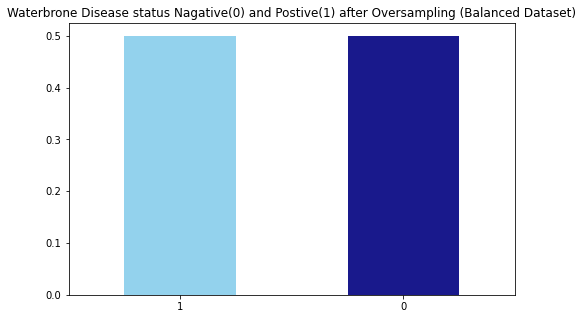

In [23]:
from sklearn.utils import resample
no = df[df.RESULT_TEXT == 0]
yes = df[df.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

In [ ]:
oversampled

,RESULT_TEXT,Age,DISTRICT_Encoded,Gender_Encoded
0,0,34,0,1
1,0,43,0,1
2,0,43,0,1
3,0,28,0,1
4,0,42,0,1
...,...,...,...,...
13513,1,8,0,1
8974,1,16,0,1
18480,1,25,0,1
20294,1,7,1,2


# **4-Splitting Training and Test Set**

In [24]:
X=oversampled.drop('RESULT_TEXT',axis=1)

In [25]:
y=oversampled[['RESULT_TEXT']]

In [ ]:
# y
X

In [ ]:
y

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **5-Modle Training**

## **5.2-Random Forest**

In [ ]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

In [28]:
y_pred1 = Ran_For.predict(X_test)
rn=Ran_For.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_test, y_test)))

Accuracy score= 0.7484


## **5.2 Model optimization** 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier



In [42]:
n_samples = 45512
n_features = 3

In [43]:
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 2, 5,],
          'min_samples_split': [2, 0.5, n_samples//2, ],
          'min_samples_leaf': [1, 0.5, n_samples//2, ],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2, ],
          'bootstrap':[True, False]
         }

In [49]:
ef_classifier_grid = GridSearchCV(ExtraTreesClassifier(random_state=1), param_grid=params, n_jobs=-1, cv=3, verbose=1)
ef_classifier_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1134 candidates, totalling 3402 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 3402 out of 3402 | elapsed: 11.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...e=1,
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
            

In [51]:
print('Train Accuracy : %.3f'%ef_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%ef_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%ef_classifier_grid.best_score_)
print('Best Parameters : ',ef_classifier_grid.best_params_)

Train Accuracy : 0.840
Test Accurqacy : 0.845
Best Accuracy Through Grid Search : 0.839
Best Parameters :  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


# **6-Saving model to disk**

In [52]:
import pickle
pickle.dump(ef_classifier_grid, open('model_rf_grid.pkl','wb'))


In [53]:
model = pickle.load(open('/content/model_rf_grid.pkl','rb'))

In [ ]:
print(model.predict([[43, 1, 1]]))

#**References**

[Random Forest Classification with H2O](https://medium.com/tech-vision/random-forest-classification-with-h2o-python-for-beginners-b31f6e4ccf3c)

[Build and deploy your first machine learning web app](https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99)

[krishnaik06/Car-Price-Prediction](https://github.com/krishnaik06/Car-Price-Prediction/blob/master/Untitled.ipynb)

[Deploy Machine Learning Model using Flask](https://www.youtube.com/watch?v=UbCWoMf80PY&ab_channel=KrishNaik)

[Live- Implementation of End To End Kaggle Machine Learning Project With Deployment
](https://www.youtube.com/watch?v=p_tpQSY1aTs&ab_channel=KrishNaik)

[Deployment-flask](https://github.com/krishnaik06/Deployment-flask)

[Flight-Fare-Prediction-Web-App
Public](https://github.com/prakash100198/Flight-Fare-Prediction-Web-App)

[Scikit-Learn - Ensemble Learning : Bootstrap Aggregation(Bagging) & Random Forests](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests#2)
